# **Regressão de Vetor Suporte - Machine Learning 08**

### Importação

In [1]:
# Libs
import numpy as np
import pandas as pd

### Base de dados

In [2]:
# Função de carregamento de dados
def carregarDados(arquivo):
    ds = pd.read_csv(arquivo, sep=';')
    # Amostra
    X = ds.iloc[:,:-1].values
    # Variável independente 
    y = ds.iloc[:,-1].values
    return X, y, ds

### Padronização de Dados

In [3]:
# Função de normalização de Dados
def padronizacao(X):
    from sklearn.preprocessing import StandardScaler
    scale = StandardScaler()
    X = scale.fit_transform(X)
    return X, scale

### Gráfico

In [4]:
# Função de Plotar gráfico
def plotarGraph(X_Points, y_Points, X_Line, y_Line):
    import matplotlib.pyplot as plt
    plt.scatter(X_Points, y_Points, color='red')
    plt.plot(X_Line, y_Line, color='blue')
    plt.title("Comparando pontos reais com a reta produzida pela regressão de vetor suporte.")
    plt.xlabel("Experiéncia em anos")
    plt.ylabel("Salário")
    plt.show()

### Regressão de Vetor Suporte

In [5]:
# Função de Vetor Suporte
def regressaoVetorSuporte(X, y, k, d):
    from sklearn.svm import SVR
    if k == 'poly':
        regressor = SVR(kernel=k, degree=d)
    else:
        regressor = SVR(kernel=k, gamma=1000.0)
    regressor.fit(X, np.ravel(y))

    return regressor

### Rodando Todas as Funções

In [6]:
# Função que roda todas as funções
def rodarRegressao(dados):
    X, y, csv = carregarDados(dados)

    X, scaleX = padronizacao(X)
    y, scaleY = padronizacao(np.reshape(y, (-1, 1)))

    svrModel = regressaoVetorSuporte(X, y, 'linear', 2)
    

    plotarGraph(
        scaleX.inverse_transform(X),
        scaleY.inverse_transform(y),
        scaleX.inverse_transform(X),
        scaleY.inverse_transform(np.reshape(svrModel.predict(X), (-1, 1)))
    )
    svrModel = regressaoVetorSuporte(X, y, 'poly', 3)
    plotarGraph(
        scaleX.inverse_transform(X),
        scaleY.inverse_transform(y),
        scaleX.inverse_transform(X),
        scaleY.inverse_transform(np.reshape(svrModel.predict(X), (-1, 1)))
    )

    svrModel = regressaoVetorSuporte(X, y, 'rbf', 2)
    plotarGraph(
        scaleX.inverse_transform(X),
        scaleY.inverse_transform(y),
        scaleX.inverse_transform(X),
        scaleY.inverse_transform(np.reshape(svrModel.predict(X), (-1, 1)))
    )


### Resultado Final

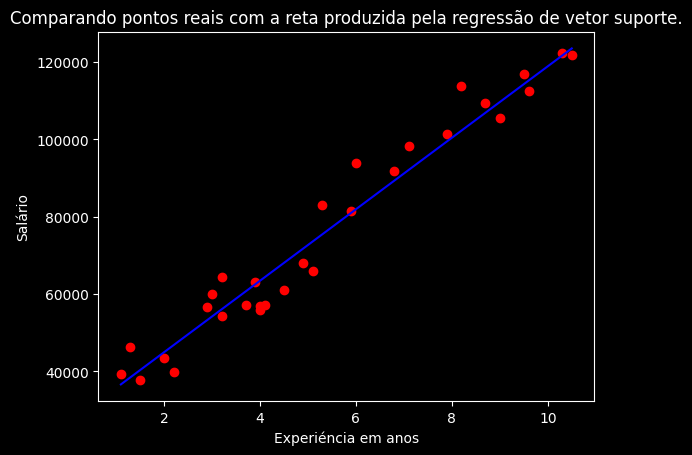

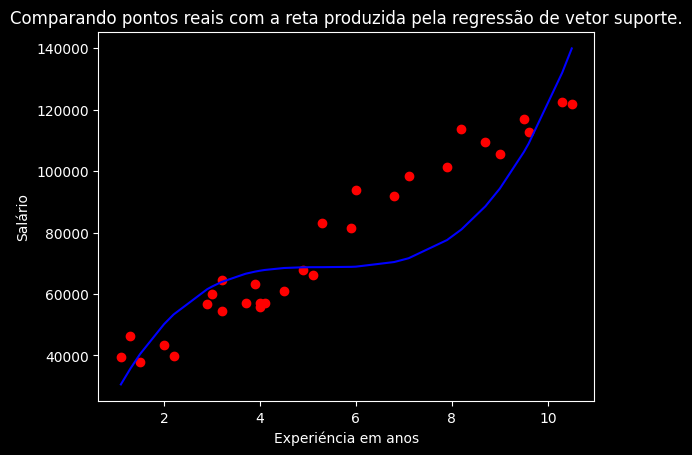

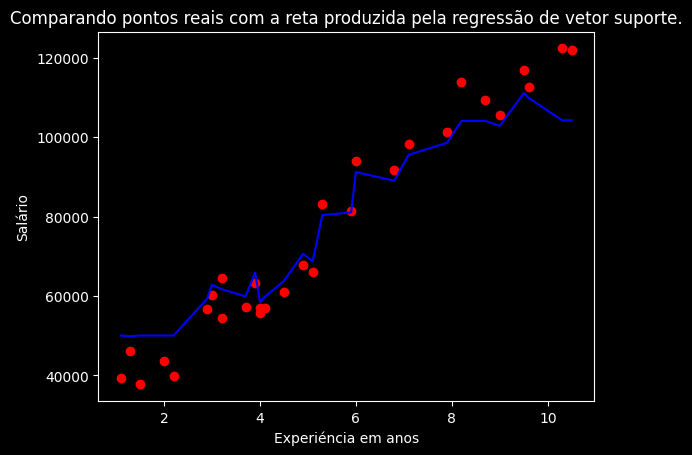

In [7]:
# # Rodando a função 
rodarRegressao('../data/salary.csv')